<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
data = pd.read_csv(house_csv)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [0]:
# ANSWER: Price

#### 2.2 List all possible variables which might be Predictor variable.

In [0]:
# ANSWER: sqft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [3]:
# ANSWER
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [15]:
data['sq__ft'] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: sq__ft, Length: 985, dtype: bool

In [17]:
# ANSWER: based on average price per sqft
data.loc[data['sq__ft'] == 0, 'sq__ft'] = np.nan

In [19]:
data.dropna(subset = ['sq__ft'], inplace = True)

In [20]:
data['price_per_sqft'] = data['price']/data['sq__ft']
data['price_per_sqft']

0       70.839713
1       58.450728
2       86.532663
3       81.346244
4      102.760351
          ...    
980    101.940789
981    158.429248
982    193.256579
983    139.644510
984    173.082232
Name: price_per_sqft, Length: 814, dtype: float64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   street          814 non-null    object 
 1   city            814 non-null    object 
 2   zip             814 non-null    int64  
 3   state           814 non-null    object 
 4   beds            814 non-null    int64  
 5   baths           814 non-null    int64  
 6   sq__ft          814 non-null    float64
 7   type            814 non-null    object 
 8   sale_date       814 non-null    object 
 9   price           814 non-null    int64  
 10  latitude        814 non-null    float64
 11  longitude       814 non-null    float64
 12  price_per_sqft  814 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 89.0+ KB


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [22]:
# ANSWER
rate = data['price_per_sqft'].mean()
rate

145.67325278723857

In [24]:
residual = abs(data['sq__ft'].sum() * rate - data['price'].sum())
residual

1904004.2972618937

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [25]:
# ANSWER
X = data['sq__ft']
Y = data['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [37]:
# ANSWER
num = np.sum((Y - Y.mean()) * (X - X.mean()))
num

44862288072.996315

In [39]:
denom = np.sum((X - X.mean())**2)
denom

358277805.6031941

In [41]:
beta_1 = num/denom
beta_1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [43]:
# ANSWER
beta_0 = Y.mean() - beta_1 * X.mean()
beta_0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [46]:
# ANSWER
Yhat = beta_0 + beta_1 * X
Yhat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [49]:
# ANSWER
residual_i = np.sum(abs(Y - Yhat))
residual_i

49030631.639216416

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [50]:
# ANSWER
SStot = np.sum((Y - Y.mean())**2)
SSres = np.sum((Y - Yhat)**2)
Rsq = 1 - (SSres/SStot)
Rsq

0.4812307133326901

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [51]:
# ANSWER
import matplotlib.pyplot as plt

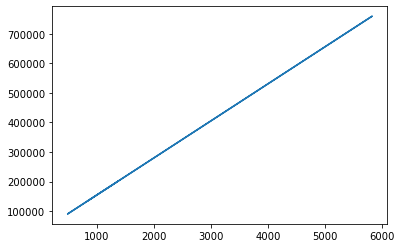

In [52]:
_ = plt.plot(X, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

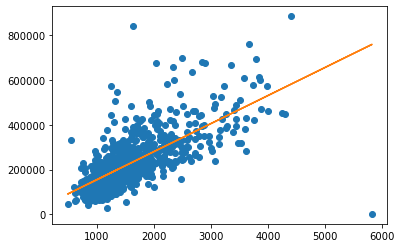

In [55]:
# ANSWER
_ = plt.plot(X, Y, 'o')
_ = plt.plot(X, Yhat)


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [57]:
# ANSWER
Y_pred = beta_0 + beta_1 * 1204
Y_pred

180971.28382945186



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



